In [10]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model, model_selection, metrics, pipeline, decomposition
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

%matplotlib inline

plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header=None)

In [4]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [5]:
np.min(df_train.values), np.max(df_train.values)

(0, 255)

In [6]:
X_train = df_train.iloc[:, 1:].values/255
X_test = df_test.iloc[:, 1:].values/255

y_train = df_train.iloc[:, 0].values
y_test = df_test.iloc[:, 0].values

In [9]:
%%time 

est = linear_model.SGDClassifier(n_jobs=4, tol=1e-5, eta0 = 0.15
                                 , random_state=1,  
                                 learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 100)
est.fit(X_train, y_train)
y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print("Accuracy: %f" % (
    metrics.accuracy_score(y_test, y_test_pred)
))


Accuracy: 0.908300
CPU times: user 11 s, sys: 201 ms, total: 11.2 s
Wall time: 4.52 s


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [13]:
pca = decomposition.PCA()
pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
X_train_pca = pca.transform(X_train_std)

In [15]:
pd.DataFrame(X_train_pca).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,60000.0,60000.0,60000.0,60000.0,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04
mean,2.760755e-17,2.385647e-16,3.510895e-16,-5.125437e-17,-1.224502e-16,3.238150e-17,-3.136028e-16,2.890577e-16,-4.339418e-16,-5.351719e-16,...,-6.334820e-33,0.0,0.0,0.0,0.0,1.425569e-20,-2.065632e-19,-5.717311e-19,1.602789e-20,1.751287e-19
std,6.362989e+00,5.407559e+00,5.178012e+00,4.548254e+00,4.251664e+00,3.966507e+00,3.713571e+00,3.538021e+00,3.317649e+00,3.170252e+00,...,3.000421e-17,0.0,0.0,0.0,0.0,2.090666e-15,1.475191e-15,1.417454e-15,1.412558e-15,1.723375e-15
min,-9.368219e+00,-1.778480e+01,-1.760270e+01,-1.806670e+01,-1.393044e+01,-1.019208e+01,-1.795500e+01,-1.208709e+01,-1.900849e+01,-1.479215e+01,...,-6.012221e-16,0.0,0.0,0.0,0.0,-2.104822e-14,-2.419547e-14,-2.417693e-14,-4.076228e-14,-2.088462e-14
25%,-4.682982e+00,-3.430592e+00,-3.647503e+00,-2.660241e+00,-2.907384e+00,-2.998608e+00,-2.295814e+00,-2.403617e+00,-1.854472e+00,-2.066437e+00,...,-1.850340e-17,0.0,0.0,0.0,0.0,-1.192143e-15,-7.816146e-16,-7.373750e-16,-7.259592e-16,-1.027987e-15
50%,-1.363513e+00,-4.690500e-01,2.917240e-01,1.372796e-01,-2.014728e-01,-4.384070e-01,-1.358035e-01,-1.376645e-01,2.143964e-01,-5.325198e-02,...,-1.151729e-20,0.0,0.0,0.0,0.0,3.977986e-17,4.729494e-17,2.481509e-17,3.797801e-17,-6.519460e-17
75%,3.160637e+00,3.257416e+00,3.395828e+00,2.398780e+00,2.868756e+00,2.465693e+00,1.921371e+00,2.003427e+00,2.103794e+00,1.903691e+00,...,1.843954e-17,0.0,0.0,0.0,0.0,1.241517e-15,8.230155e-16,7.619132e-16,7.799412e-16,9.858661e-16
max,3.222950e+01,2.811128e+01,2.503657e+01,2.183777e+01,1.889584e+01,2.293847e+01,3.110225e+01,2.594324e+01,1.927259e+01,2.489746e+01,...,5.375371e-16,0.0,0.0,0.0,0.0,6.067158e-14,3.070078e-14,5.350700e-14,2.622457e-14,4.521882e-14


In [16]:
pd.DataFrame(X_train_std).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.706754e-15,4.401866e-15,-4.528355e-15,2.256949e-15,-4.047425e-15,1.644043e-15,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.317103e-02,-2.246288e-02,-1.606909e-02,-1.143220e-02,-9.007295e-03,-5.770394e-03,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.317103e-02,-2.246288e-02,-1.606909e-02,-1.143220e-02,-9.007295e-03,-5.770394e-03,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.317103e-02,-2.246288e-02,-1.606909e-02,-1.143220e-02,-9.007295e-03,-5.770394e-03,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.317103e-02,-2.246288e-02,-1.606909e-02,-1.143220e-02,-9.007295e-03,-5.770394e-03,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.200296e+01,6.418128e+01,8.907405e+01,1.499806e+02,1.513374e+02,1.788764e+02,0.0,0.0,0.0,0.0


In [17]:
# What is the reduced dimension? - how do we determine it?

Text(0,0.5,'Explain variance (normalized)')

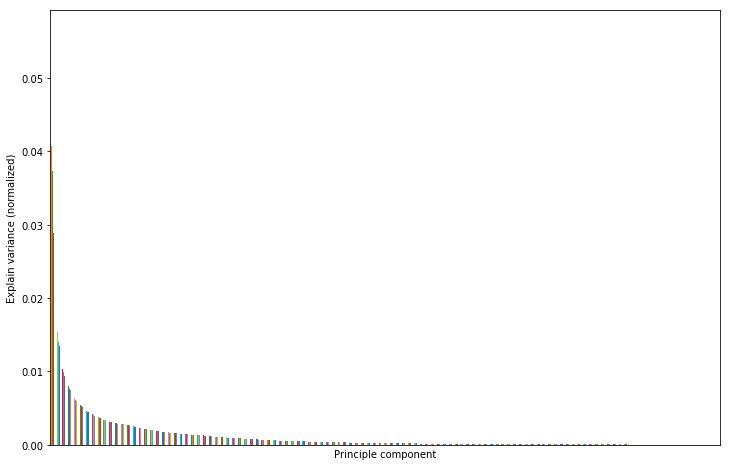

In [21]:
pd.Series(pca.explained_variance_ratio_).plot.bar()
plt.xticks([])
plt.xlabel("Principle component")
plt.ylabel("Explain variance (normalized)")

We like to retain 99% of cumulative variance across the principle components

In [26]:
cumsum = pd.Series(pca.explained_variance_ratio_).cumsum()
cumsum[cumsum>0.99][:10]

542    0.990088
543    0.990183
544    0.990276
545    0.990369
546    0.990462
547    0.990554
548    0.990646
549    0.990737
550    0.990827
551    0.990917
dtype: float64

So we need 542 PC axis to retain 99% of variance of the original data



In [29]:
pca = decomposition.PCA(n_components=542, random_state=1)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [31]:
pd.DataFrame(X_train_pca).head()

,0,1,2,3,4,5,6,7,8,9,...,532,533,534,535,536,537,538,539,540,541
0,-0.922159,-4.814790,0.067560,-8.051329,-0.985347,0.951616,0.336139,1.393473,1.052314,2.324207,...,0.602718,0.074542,-0.309462,0.308765,-0.340700,0.157522,0.149455,0.074061,-0.119031,-0.445882
1,8.708977,-7.754403,-3.447910,-1.668321,0.834795,-5.144664,-0.272279,3.135456,0.198393,-1.196196,...,-0.349320,-0.434829,0.271305,0.089685,0.361878,-0.289922,0.230116,-0.288011,0.313694,0.199922
2,2.328389,9.431338,-6.184114,1.725066,4.092456,2.291390,18.691539,3.992473,-2.170118,-0.151141,...,-0.204364,0.453804,0.068233,-0.291753,-0.667527,-0.595304,-0.008188,0.247196,-0.381644,0.067577
3,-6.582173,-3.746318,3.690851,-0.461041,5.627325,3.461544,1.561415,-4.600462,0.624820,-2.617184,...,0.028653,0.243112,-0.373994,0.398972,0.016513,-0.364869,-0.073570,-0.237479,-0.017311,-0.083918
4,-5.183251,3.133297,-6.277947,1.459654,-1.608842,-0.612565,-0.580065,-3.206010,-0.012948,-0.699051,...,-0.202213,0.255588,-0.341606,-0.208348,0.264956,-0.115862,0.220963,-0.114447,0.260369,0.326013


In [32]:
%%time 

est = linear_model.SGDClassifier(n_jobs=4, tol=1e-5, eta0 = 0.15
                                 , random_state=1,  
                                 learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 100)
est.fit(X_train_pca, y_train)
y_train_pred = est.predict(X_train_pca)
y_test_pred = est.predict(X_test_pca)

print("Accuracy: %f" % (
    metrics.accuracy_score(y_test, y_test_pred)
))


Accuracy: 0.918400
CPU times: user 8.13 s, sys: 267 ms, total: 8.4 s
Wall time: 3.43 s


In [39]:
pca = decomposition.PCA(n_components=100, random_state=1)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

est = linear_model.SGDClassifier(n_jobs=4, tol=1e-5, eta0 = 0.15
                                 , random_state=1,  
                                 learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 100)
est.fit(X_train_pca, y_train)
y_train_pred = est.predict(X_train_pca)
y_test_pred = est.predict(X_test_pca)

print("Accuracy: %f" % (
    metrics.accuracy_score(y_test, y_test_pred)
))

Accuracy: 0.906300


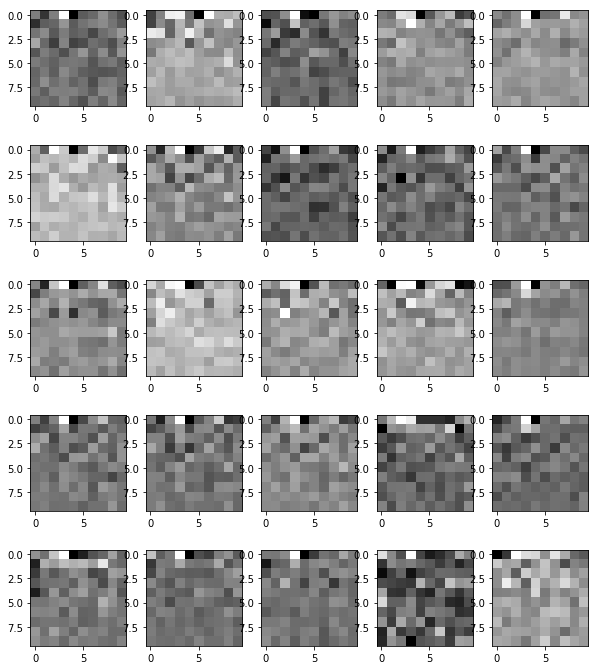

In [44]:
fig, axes = plt.subplots(5, 5, figsize = (10, 12))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_train_pca[y_train == 6][i].reshape((10, 10)), cmap="gray")

In [38]:
pca = decomposition.PCA(n_components=50, random_state=1)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

est = linear_model.SGDClassifier(n_jobs=4, tol=1e-5, eta0 = 0.15
                                 , random_state=1,  
                                 learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 100)
est.fit(X_train_pca, y_train)
y_train_pred = est.predict(X_train_pca)
y_test_pred = est.predict(X_test_pca)

print("Accuracy: %f" % (
    metrics.accuracy_score(y_test, y_test_pred)
))

Accuracy: 0.890600


In [45]:
np.sum(pca.explained_variance_ratio_)

0.7033728142799544